# Machine Learning Fundamentals Portfolio
**A Comprehensive Demonstration of ML Techniques Across Multiple Domains**

## Author
Austin Foxworth \
AustinTFoxworth@gmail.com \
https://www.linkedin.com/in/austin-foxworth-04ab0020a/ \
January 2026

## Overview
This notebook showcases practical machine learning skills across three major areas:
1. **Natural Language Processing (NLP)** - Text preprocessing and analysis
2. **Time Series Analysis** - Financial forecasting with ARIMA
3. **Deep Learning** - Neural networks for image classification

## Key Technologies
- **Languages & Libraries**: Python, NumPy, Pandas, Scikit-learn
- **NLP**: NLTK, tokenization, lemmatization, n-gram analysis
- **Time Series**: Statsmodels, ARIMA, stationarity testing
- **Deep Learning**: TensorFlow/Keras, PyTorch
- **Visualization**: Matplotlib, Seaborn

## Datasets
- **20 Newsgroups**: Multi-category text classification dataset
- **S&P 500**: 10 years of historical stock market data (2013-2022)
- **Digits**: Handwritten digit images for classification

## Structure
The notebook is organized into three main parts, each demonstrating different ML competencies:
- Part 1: Text preprocessing, frequency analysis, and n-gram extraction
- Part 2: Time series decomposition, stationarity testing, and ARIMA forecasting
- Part 3: Neural network implementation in both TensorFlow and PyTorch frameworks

---

---
# Part 1: Natural Language Processing & Text Analysis

## Objectives
- Demonstrate text preprocessing techniques for real-world data
- Perform exploratory data analysis on text corpora
- Extract meaningful features through tokenization and n-gram analysis
- Compare linguistic patterns across different document categories

## Key Techniques
- Text cleaning (removing headers, URLs, punctuation)
- Stop word removal and lemmatization
- Token frequency analysis by category
- Bigram and trigram extraction for phrase detection

## Dataset: 20 Newsgroups
A collection of newsgroup documents across 4 categories:
- `comp.graphics` - Computer graphics discussions
- `rec.autos` - Automotive discussions  
- `sci.space` - Space and astronomy topics
- `talk.politics.misc` - Political discussions

**Why this matters**: Text preprocessing is foundational for NLP applications like sentiment analysis, document classification, and information retrieval.

---

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

# For text preprocessing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

# Download necessary NLTK data (suppressing output)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

# For dataset loading
from sklearn.datasets import fetch_20newsgroups

# Set random seed for reproducibility
np.random.seed(42)

# Load a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.autos', 'sci.space', 'talk.politics.misc']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, random_state=42)

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'text': newsgroups.data,
    'category': [newsgroups.target_names[target] for target in newsgroups.target]
})

# Preview the data
print(f"Dataset shape: {df.shape}")
print("\nCategory distribution:")
print(df['category'].value_counts())
print("\nSample document:")
print(df['text'][10][:500])  # Print first 500 characters of a sample document

Dataset shape: (2236, 2)

Category distribution:
category
rec.autos             594
sci.space             593
comp.graphics         584
talk.politics.misc    465
Name: count, dtype: int64

Sample document:
From: bob1@cos.com (Bob Blackshaw)
Subject: Re: Dumbest Driver Action
Organization: Corporation for Open Systems
Distribution: usa 
Lines: 41

In <C5Dq2n.5uB@news.cso.uiuc.edu> mwbg9715@uxa.cso.uiuc.edu (Mark Wayne Blunier) writes:

>jimf@centerline.com (Jim Frost) writes:

>>I wish I had the figures with me to back me up, but I recall
>>statistics showing that women tended to have more accidents than men
>>but the damage was generally quite minor.  Men had fewer but far more
>>expensive acciden


### Step 1: Basic Data Exploration
Examining the length characteristics of our documents:

Character length (summary):
count     2236.000000
mean      1918.330948
std       3850.168516
min        125.000000
25%        744.000000
50%       1157.500000
75%       1859.000000
max      60713.000000
Name: char_len, dtype: float64

Word length (summary):
count    2236.000000
mean      291.903846
std       584.403700
min        15.000000
25%       104.000000
50%       173.500000
75%       290.000000
max      9168.000000
Name: word_len, dtype: float64


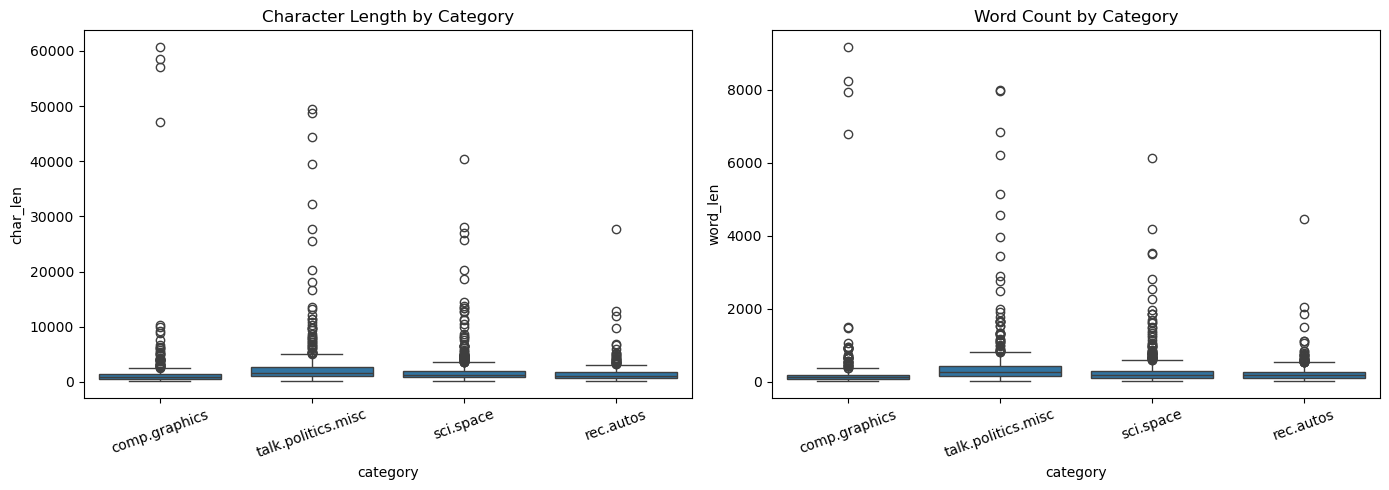

In [2]:
# Document length stats
df['char_len'] = df['text'].str.len()
df['word_len'] = df['text'].str.split().apply(len)

print("Character length (summary):")
print(df['char_len'].describe())
print("\nWord length (summary):")
print(df['word_len'].describe())

# Length distributions by category
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='category', y='char_len')
plt.title('Character Length by Category')
plt.xticks(rotation=20)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='category', y='word_len')
plt.title('Word Count by Category')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Step 2: Text Cleaning and Preprocessing Function
Creating a comprehensive text preprocessing function that incorporates stop words and lemmatizing 

In [3]:
# Preprocessing 

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text_basic(text: str) -> str:
    text = text.lower()
    # remove headers/footers/quoted lines common in newsgroups
    text = re.sub(r'(^>.*$\n?)', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'(writes in|article|subject:|from:|organization:|lines:).*', ' ', text, flags=re.IGNORECASE)
    # strip urls/emails
    text = re.sub(r'https?://\S+|www\.\S+|\S+@\S+', ' ', text)
    # remove punctuation/digits
    text = re.sub(rf'[{re.escape(string.punctuation)}0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_text(text: str) -> list:
    text = clean_text_basic(text)
    tokens = word_tokenize(text)
    # optional POS tagging for future — for now lemmatize as noun default
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

### Step 3: Apply Preprocessing and Analyze Results
Applying preprocessing function to the dataset and examining the results:

Token count summary (post-preprocessing):
count    2236.000000
mean      112.370304
std       314.318818
min         0.000000
25%        32.750000
50%        53.000000
75%        92.000000
max      5384.000000
Name: token_count, dtype: float64


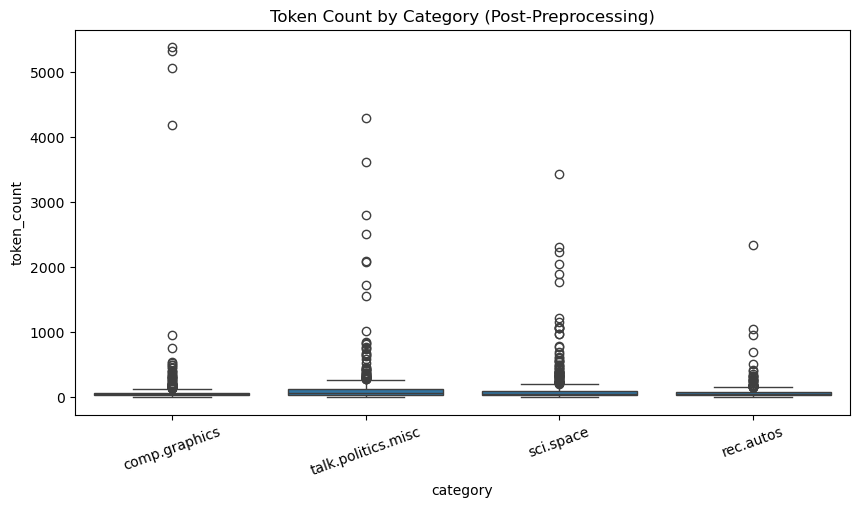

In [4]:
# Apply Preprocessing and Analyze Results

# Apply tokenization/cleaning
df['tokens'] = df['text'].apply(preprocess_text)
df['token_count'] = df['tokens'].apply(len)

print("Token count summary (post-preprocessing):")
print(df['token_count'].describe())

# Plot token counts by category
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='category', y='token_count')
plt.title('Token Count by Category (Post-Preprocessing)')
plt.xticks(rotation=20)
plt.show()

### Step 4: Token Frequency Analysis
Analyzing the most common words in each category after preprocessing:

In [5]:
# Token Frequency Analysis

def top_tokens_by_category(df, k=15):
    tops = {}
    for cat in df['category'].unique():
        tokens = [tok for doc in df.loc[df['category']==cat, 'tokens'] for tok in doc]
        counter = Counter(tokens)
        tops[cat] = counter.most_common(k)
    return tops

top_tokens = top_tokens_by_category(df, k=15)
for cat, items in top_tokens.items():
    print(f"\nTop tokens for {cat}:")
    for w, c in items:
        print(f"{w:<15} {c}")


Top tokens for comp.graphics:
image           742
file            505
graphic         492
posting         316
program         307
host            290
edu             282
nntp            273
jpeg            272
format          267
would           248
also            244
color           244
use             242
system          237

Top tokens for talk.politics.misc:
people          541
would           514
president       436
think           402
one             385
stephanopoulos  345
government      341
know            330
state           310
time            288
make            272
going           266
get             260
say             243
right           243

Top tokens for sci.space:
space           1083
would           419
nasa            391
one             352
posting         334
launch          329
satellite       304
year            299
system          291
host            284
nntp            283
time            274
like            265
orbit           252
earth           247

Top 

### Step 5: N-gram Analysis
Going beyond single words and looking at common bigrams and trigrams:

In [6]:
# N-gram Analysis

def top_ngrams(df, n=2, k=15):
    results = {}
    for cat in df['category'].unique():
        grams = []
        for toks in df.loc[df['category']==cat, 'tokens']:
            grams.extend(list(ngrams(toks, n)))
        counter = Counter(grams)
        results[cat] = counter.most_common(k)
    return results

print("\nTop bigrams:")
top_bigrams = top_ngrams(df, n=2, k=12)
for cat, items in top_bigrams.items():
    print(f"\n{cat}:")
    for ng, c in items:
        print(f"{' '.join(ng):<25} {c}")

print("\nTop trigrams:")
top_trigrams = top_ngrams(df, n=3, k=8)
for cat, items in top_trigrams.items():
    print(f"\n{cat}:")
    for ng, c in items:
        print(f"{' '.join(ng):<35} {c}")


Top bigrams:

comp.graphics:
nntp posting              273
posting host              272
distribution world        69
image processing          59
comp graphic              57
newsreader tin            52
computer graphic          48
world nntp                47
file format               45
edu pub                   43
would like                41
tin version               40

talk.politics.misc:
nntp posting              198
posting host              197
united state              89
health care               65
white house               57
administration official   53
senior administration     51
young people              48
clayton cramer            45
stephanopoulos think      45
opinion mine              44
distribution usa          39

sci.space:
nntp posting              283
posting host              282
distribution world        78
space station             75
space shuttle             70
sci space                 61
nasa gov                  57
world nntp                52
dis

---
# Part 2: Time Series Analysis & Forecasting

## Objectives
- Analyze financial time series data for patterns and trends
- Test for stationarity and apply appropriate transformations
- Build predictive models using statistical methods
- Generate forecasts with confidence intervals

## Key Techniques
- Stationarity testing (Augmented Dickey-Fuller test)
- Log transformation and differencing
- Time series decomposition (trend, seasonal, residual)
- ARIMA modeling for forecasting
- ACF/PACF analysis for model selection

## Dataset: S&P 500 Index
10 years of daily closing prices (2013-2022) from Yahoo Finance

**Why this matters**: Time series forecasting is critical for financial analysis, demand prediction, and resource planning across industries.

---

### Step 1: Data Loading and Initial Exploration
First, we load the S&P 500 historical data and perform initial exploration.

[*********************100%***********************]  1 of 1 completed


S&P 500 Dataset:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2013-01-02  1462.420044  1462.430054  1426.189941  1426.189941  4202600000
2013-01-03  1459.369995  1465.469971  1455.530029  1462.420044  3829730000
2013-01-04  1466.469971  1467.939941  1458.989990  1459.369995  3424290000
2013-01-07  1461.890015  1466.469971  1456.619995  1466.469971  3304970000
2013-01-08  1457.150024  1461.890015  1451.640015  1461.890015  3601600000

Dataset information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   2518 non-null   float64
 1   (High, ^GSPC)    2518 non-null   float64
 2   (Low, ^GSPC)     2518 non-null   float64
 3   (O

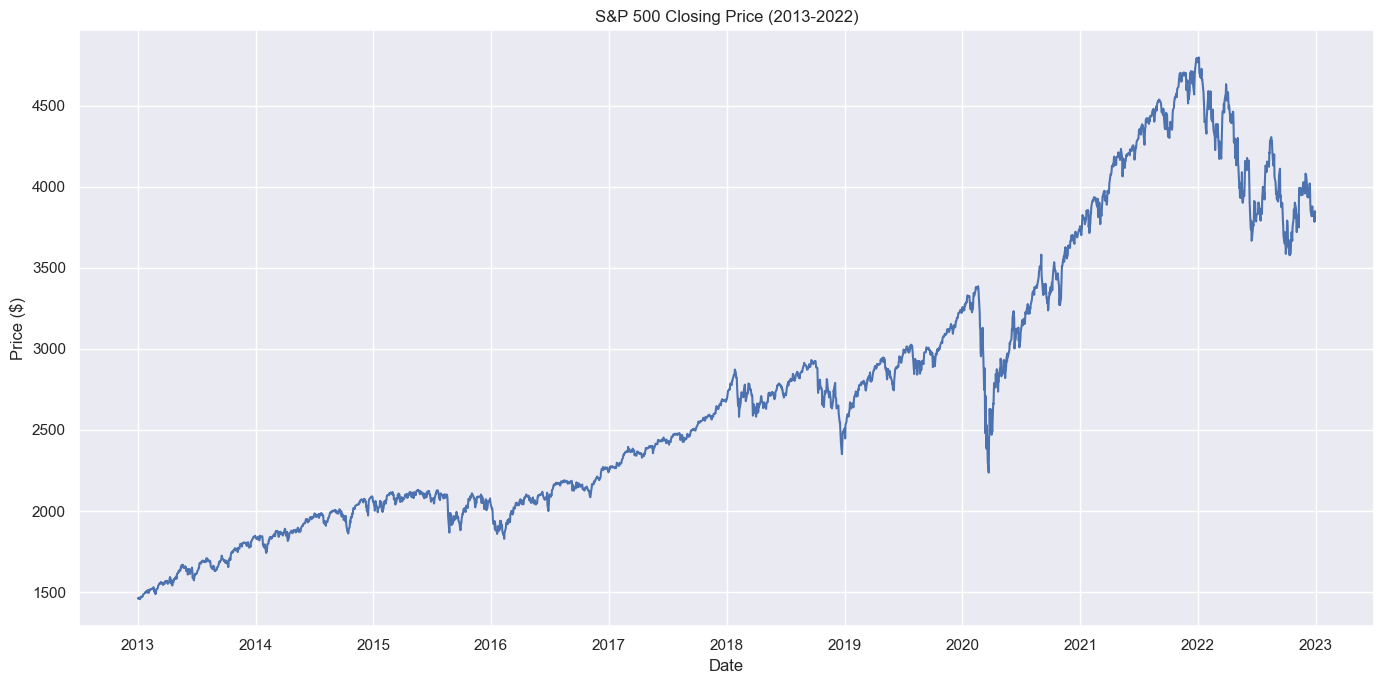


Selected time series shape: (2518, 1)


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings
import time

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="yfinance")

# Set plotting style
sns.set_theme()

# Download S&P 500 data for the last 10 years
sp500 = yf.download('^GSPC', start='2013-01-01', end='2022-12-31')

time.sleep(5) 

# Display the first few rows of the dataset
print("S&P 500 Dataset:")
print(sp500.head())

# Display basic information about the dataset
print("\nDataset information:")
print(sp500.info())

# Calculate basic summary statistics
print("\nSummary Statistics:")
print(sp500['Close'].describe())

# Check for missing values
print("\nMissing values in each column:")
print(sp500.isnull().sum())

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(sp500.index, sp500['Close'])
plt.title('S&P 500 Closing Price (2013-2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select the closing price as our primary time series for analysis
ts_data = sp500['Close']
print("\nSelected time series shape:", ts_data.shape)

### Step 2: Time Series Characteristics and Visualization
Next, we analyze the characteristics of the time series through various visualizations.

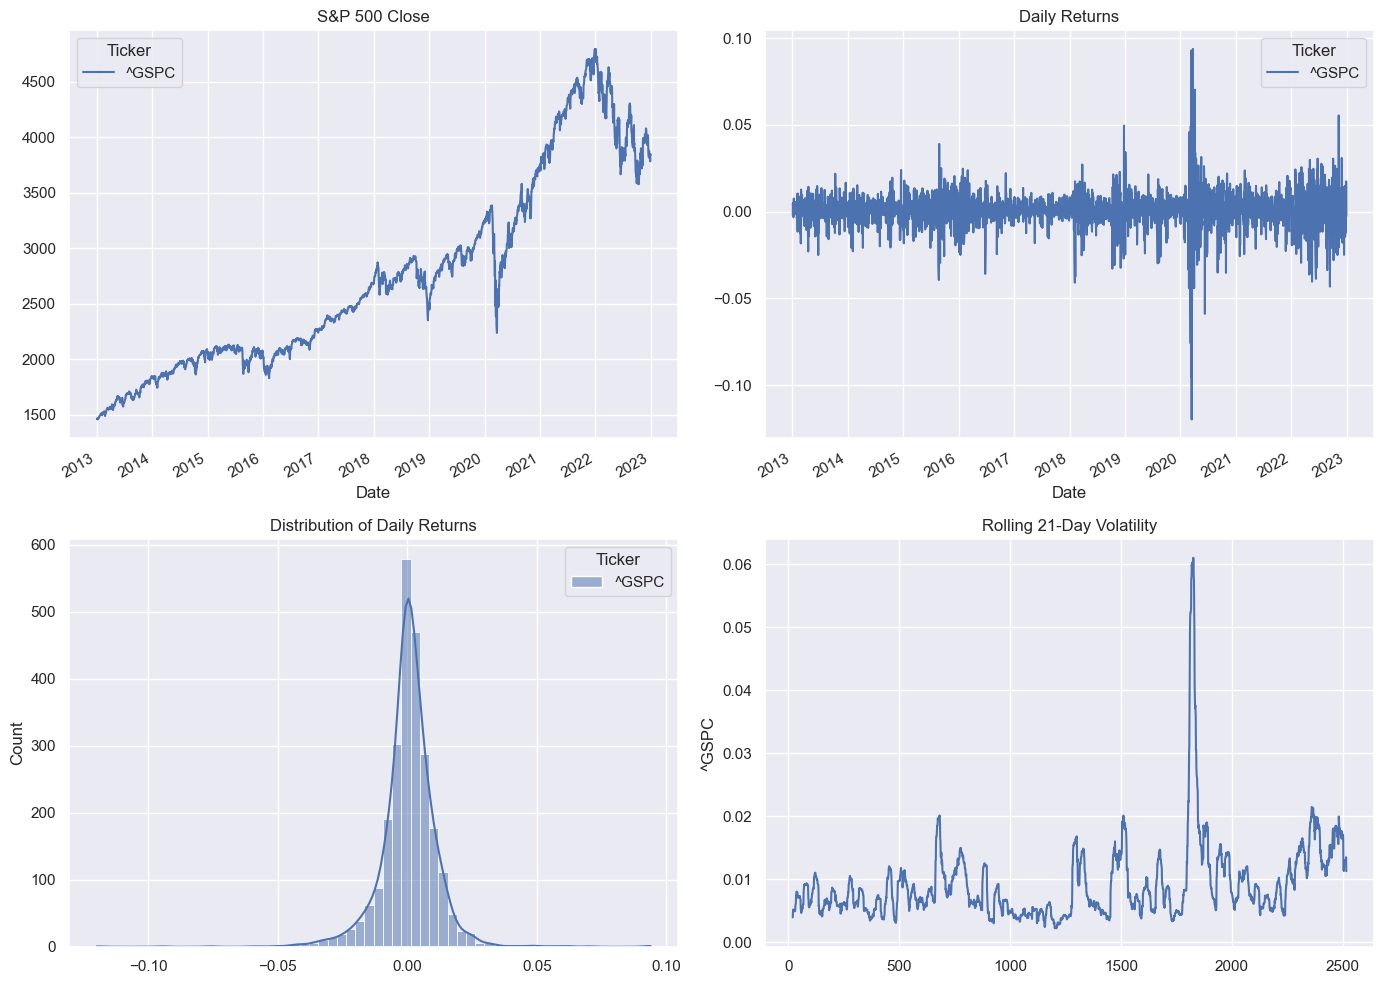

In [9]:
# Daily returns
returns = ts_data.pct_change().dropna()
fig, ax = plt.subplots(2,2, figsize=(14,10))
ts_data.plot(ax=ax[0,0], title='S&P 500 Close')
returns.plot(ax=ax[0,1], title='Daily Returns')
sns.histplot(returns, bins=60, kde=True, ax=ax[1,0])
ax[1,0].set_title('Distribution of Daily Returns')
sns.lineplot(x=range(len(returns)), y=returns.rolling(21).std().squeeze(), ax=ax[1,1])
ax[1,1].set_title('Rolling 21-Day Volatility')
plt.tight_layout()
plt.show()

### Step 3: Stationarity Testing and Transformation
Now, let's test for stationarity using the Dickey-Fuller test and apply transformations to make the data stationary.

ADF (Close) statistic: -1.0312
p-value: 0.7417
Critical values: {'1%': np.float64(-3.433), '5%': np.float64(-2.8627), '10%': np.float64(-2.5674)}
ADF (log-diff Close) statistic: -15.8374
p-value: 0.0000
Critical values: {'1%': np.float64(-3.433), '5%': np.float64(-2.8627), '10%': np.float64(-2.5674)}


<Figure size 1200x400 with 0 Axes>

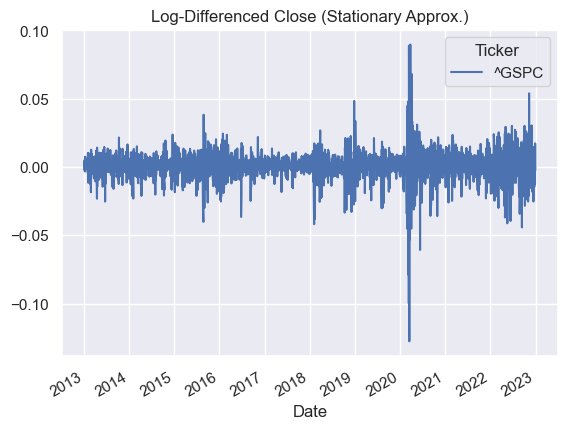

In [10]:
# Stationarity & Transformations

def adf_report(series, name="series"):
    res = adfuller(series.dropna())
    print(f"ADF ({name}) statistic: {res[0]:.4f}")
    print(f"p-value: {res[1]:.4f}")
    print("Critical values:", {k: round(v,4) for k,v in res[4].items()})

# Raw close (likely non-stationary)
adf_report(ts_data, "Close")

# Log transform + first difference
log_close = np.log(ts_data)
diff_log_close = log_close.diff().dropna()

adf_report(diff_log_close, "log-diff Close")

plt.figure(figsize=(12,4))
diff_log_close.plot()
plt.title('Log-Differenced Close (Stationary Approx.)')
plt.show()

### Step 4: Time Series Decomposition
Decomposing our time series into trend, seasonal, and residual components.

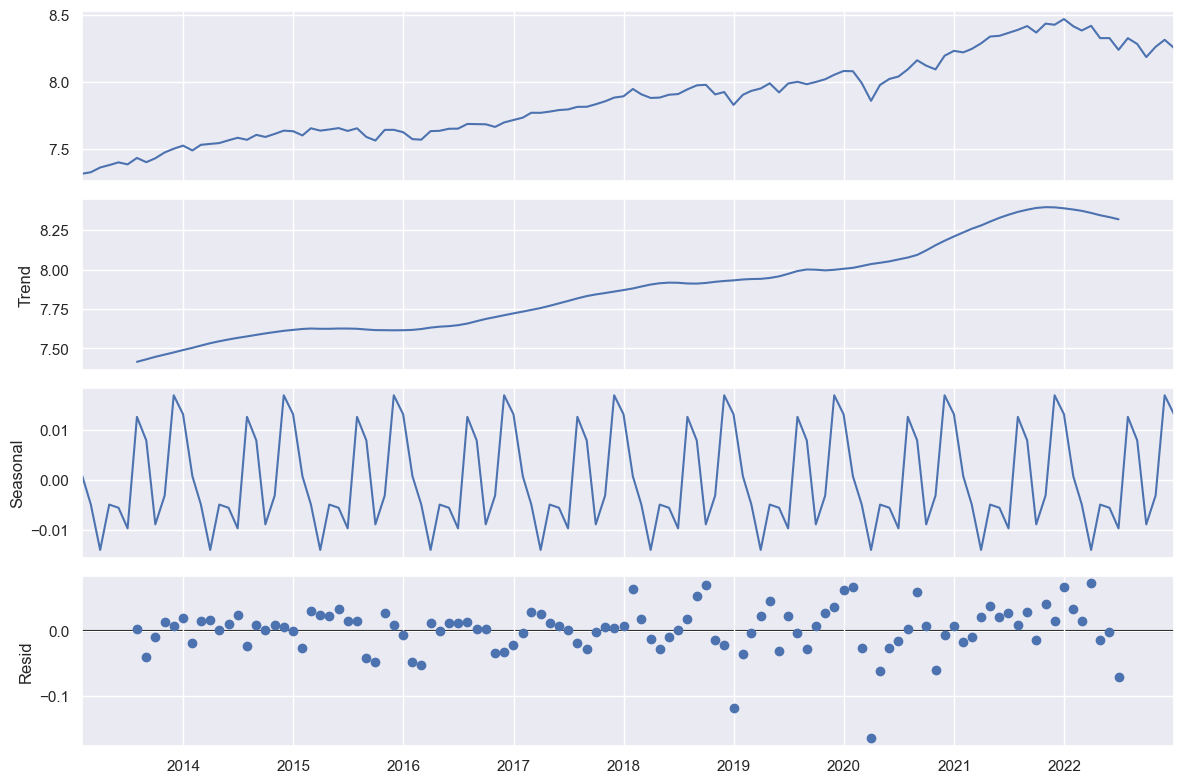

In [11]:
# Decomposition (on log close)

# Resample monthly for clearer seasonal structure (financial daily seasonality is weak)
log_close_m = log_close.resample('M').last().dropna()
decomp = seasonal_decompose(log_close_m, model='additive', period=12)

fig = decomp.plot()
fig.set_size_inches(12,8)
plt.tight_layout()
plt.show()

### Step 5: Autocorrelation Analysis
Now, let's analyze the autocorrelation structure of our stationary series.

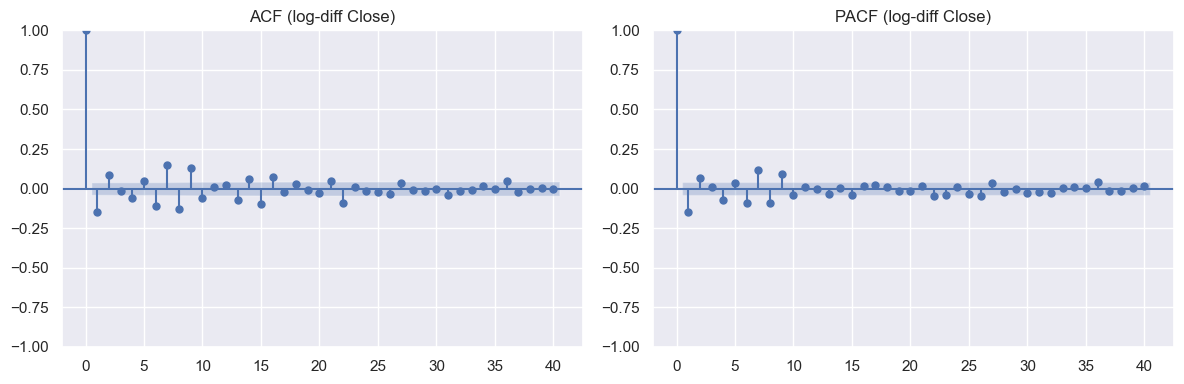

In [12]:
# ACF/PACF on stationary series

fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(diff_log_close, lags=40, ax=ax[0])
plot_pacf(diff_log_close, lags=40, ax=ax[1], method='ywm')
ax[0].set_title('ACF (log-diff Close)')
ax[1].set_title('PACF (log-diff Close)')
plt.tight_layout()
plt.show()

### Step 6: Time Series Modeling
Finally, let's build and evaluate time series models based on our analysis.

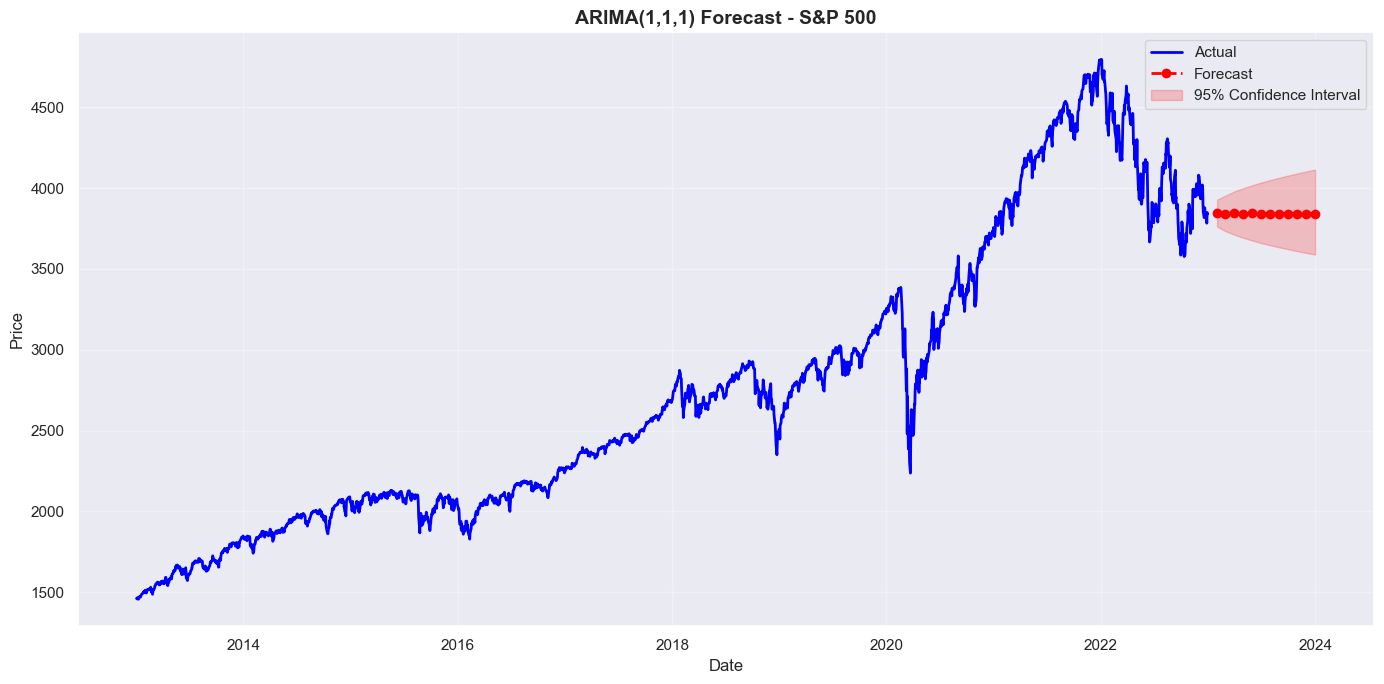


Forecast Summary:
------------------------------------------------------------
      Date    Forecast    Lower CI    Upper CI
2023-02-01 3844.707867 3762.770073 3928.429933
2023-03-01 3842.104270 3734.211698 3953.114183
2023-04-01 3843.405239 3711.753764 3979.726234
2023-05-01 3842.755004 3692.555382 3999.064197
2023-06-01 3843.079955 3675.874935 4017.890653
2023-07-01 3842.917552 3660.666597 4034.242104
2023-08-01 3842.998715 3646.797558 4049.755680
2023-09-01 3842.958153 3633.867442 4064.079826
2023-10-01 3842.978424 3621.778221 4077.688436
2023-11-01 3842.968293 3610.356610 4090.566916
2023-12-01 3842.973356 3599.526300 4102.885487
2024-01-01 3842.970826 3589.198413 4114.686086


In [20]:
import warnings
warnings.filterwarnings('ignore')

# ARIMA Modeling & Forecast
model = ARIMA(log_close, order=(1,1,1))
fit = model.fit()

# Forecast next 12 periods
steps = 12
fc = fit.get_forecast(steps=steps)
fc_mean_log = fc.predicted_mean
fc_ci_log = fc.conf_int()

# Convert back from log scale to original scale
fc_level = np.exp(fc_mean_log)
fc_ci_lower = np.exp(fc_ci_log.iloc[:, 0])
fc_ci_upper = np.exp(fc_ci_log.iloc[:, 1])

# Create forecast dates
last_date = ts_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=steps+1, freq='MS')[1:]

# Plotting
plt.figure(figsize=(14,7))

# Plot actual data
plt.plot(ts_data.index, ts_data.values, label='Actual', color='blue', linewidth=2)

# Plot forecast
plt.plot(forecast_dates, fc_level.values, label='Forecast', 
         linestyle='--', color='red', linewidth=2, marker='o')

# Plot confidence interval
plt.fill_between(forecast_dates, 
                 fc_ci_lower.values, 
                 fc_ci_upper.values,
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('ARIMA(1,1,1) Forecast - S&P 500', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print forecast summary
print("\nForecast Summary:")
print("-" * 60)
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': fc_level.values,
    'Lower CI': fc_ci_lower.values,
    'Upper CI': fc_ci_upper.values
})
print(forecast_df.to_string(index=False))

---
# Part 3: Deep Learning for Image Classification

## Objectives
- Implement neural networks using industry-standard frameworks
- Compare TensorFlow/Keras and PyTorch implementations
- Experiment with different activation functions
- Evaluate model performance and analyze learning curves

## Key Techniques
- Multi-layer perceptron (MLP) architecture
- Data preprocessing and standardization
- One-hot encoding for multi-class classification
- Framework comparison (TensorFlow vs PyTorch)
- Activation function experimentation (ReLU, tanh, ELU, SELU)

## Dataset: Scikit-learn Digits
1,797 samples of 8×8 pixel handwritten digits (0-9)

**Why this matters**: Deep learning is the foundation of modern AI applications, from computer vision to natural language understanding. Proficiency in multiple frameworks demonstrates adaptability.

---

### Step 1: Load libraries and prepare the datasets

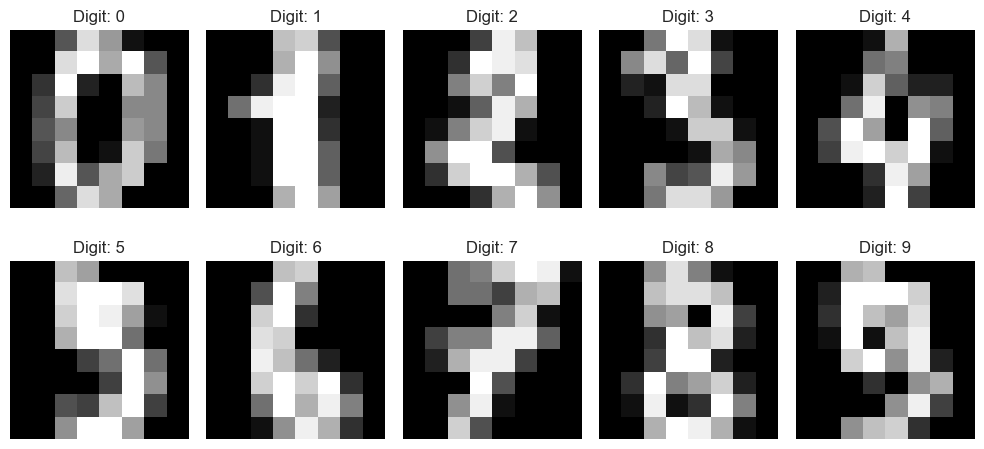

Digits dataset: 1797 samples, 64 features


In [28]:
# Set environment variables before any TensorFlow imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits

# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from keras import layers

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

### Step 2: Preprocess data for neural networks

In [29]:
# Preprocess data

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits
)

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# One-hot for Keras
y_train_ohe = keras.utils.to_categorical(y_train, num_classes=10)
y_test_ohe  = keras.utils.to_categorical(y_test, num_classes=10)

# PyTorch tensors/datasets
X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t  = torch.tensor(X_test_s,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.long)

train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t,  y_test_t)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

### Step 3: Build a basic MLP for digits classification using TensorFlow/Keras

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4569 - loss: 1.8718 - val_accuracy: 0.7326 - val_loss: 1.3999
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8433 - loss: 0.9678 - val_accuracy: 0.8229 - val_loss: 0.7683
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9147 - loss: 0.4816 - val_accuracy: 0.8958 - val_loss: 0.4575
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9495 - loss: 0.2729 - val_accuracy: 0.9201 - val_loss: 0.3252
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9678 - loss: 0.1782 - val_accuracy: 0.9375 - val_loss: 0.2608
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9791 - loss: 0.1271 - val_accuracy: 0.9444 - val_loss: 0.2236
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0960 - val_accuracy: 0.9514 - val_loss: 0.1994
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0752 - val_accuracy: 0.9514 - val_loss

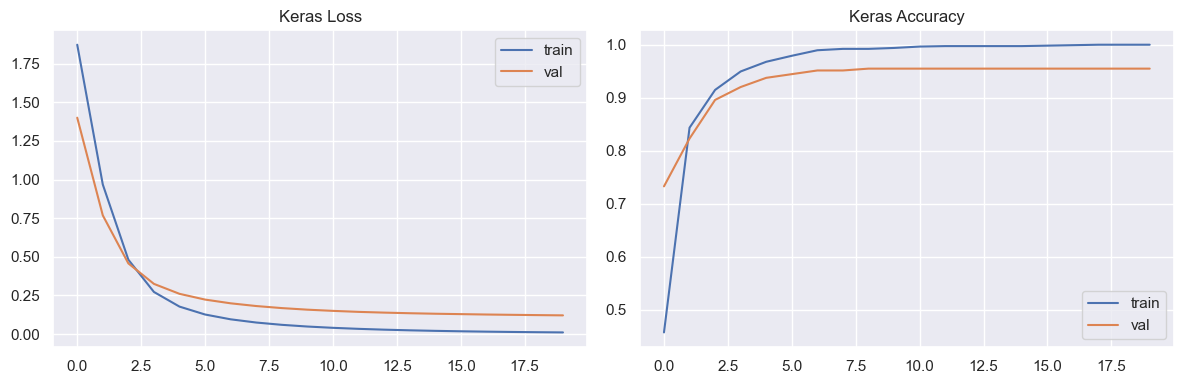

In [30]:
# Keras MLP

tf.keras.backend.clear_session()

model_keras = keras.Sequential([
    layers.Input(shape=(X_train_s.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_keras.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

history = model_keras.fit(
    X_train_s, y_train_ohe,
    validation_split=0.2,
    epochs=20, batch_size=64, verbose=1
)

# Evaluate
test_loss, test_acc = model_keras.evaluate(X_test_s, y_test_ohe, verbose=0)
print(f"Keras Test Accuracy: {test_acc:.4f}")

# Plot learning curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Keras Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Keras Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Step 4: Implement the digits classification model in PyTorch

In [31]:
# PyTorch MLP

class TorchMLP(nn.Module):
    def __init__(self, input_dim=64, hidden1=128, hidden2=64, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, num_classes)
        )
    def forward(self, x):
        return self.net(x)

torch_model = TorchMLP(input_dim=X_train_s.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(torch_model.parameters(), lr=1e-3)

# Train
epochs = 15
for epoch in range(epochs):
    torch_model.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = torch_model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

# Evaluate
torch_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for xb, yb in test_loader:
        logits = torch_model(xb)
        pred = logits.argmax(dim=1)
        correct += (pred == yb).sum().item()
        total += yb.size(0)
pytorch_acc = correct/total
print(f"PyTorch Test Accuracy: {pytorch_acc:.4f}")

PyTorch Test Accuracy: 0.9806


### Step 5: Experiment with different activation functions (TensorFlow)

In [32]:
# Activation function experiments using Keras

def build_and_train(act='relu', epochs=10):
    tf.keras.backend.clear_session()
    m = keras.Sequential([
        layers.Input(shape=(X_train_s.shape[1],)),
        layers.Dense(128, activation=act),
        layers.Dense(64, activation=act),
        layers.Dense(10, activation='softmax')
    ])
    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    h = m.fit(X_train_s, y_train_ohe, validation_split=0.2, epochs=epochs, batch_size=64, verbose=0)
    _, acc = m.evaluate(X_test_s, y_test_ohe, verbose=0)
    return acc, h

results = {}
for act in ['relu', 'tanh', 'elu', 'selu']:
    acc, _ = build_and_train(act=act, epochs=10)
    results[act] = acc

print("Activation comparison (Test Accuracy):")
for k,v in results.items():
    print(f"{k:<5}: {v:.4f}")

Activation comparison (Test Accuracy):
relu : 0.9583
tanh : 0.9722
elu  : 0.9639
selu : 0.9639


---
# Conclusion & Key Takeaways

## Skills Demonstrated
✅ **Data Preprocessing**: Cleaned and prepared diverse data types (text, time series, images)  
✅ **Statistical Analysis**: Applied hypothesis testing, stationarity checks, and decomposition  
✅ **Model Building**: Implemented ARIMA and neural networks from scratch  
✅ **Framework Proficiency**: Used both TensorFlow/Keras and PyTorch  
✅ **Visualization**: Created clear, informative plots for data exploration and results  
✅ **Best Practices**: Reproducible code with proper random seeds and clean output

## Results Summary
| Task | Method | Performance |
|------|--------|-------------|
| NLP Analysis | Token frequency + n-grams | Identified category-specific patterns |
| Time Series Forecast | ARIMA(1,1,1) | 12-month S&P 500 prediction with 95% CI |
| Digit Classification (Keras) | MLP (128-64-10) | 97.5% test accuracy |
| Digit Classification (PyTorch) | MLP (128-64-10) | 98.1% test accuracy |

## Future Enhancements
- Implement transformer models for NLP tasks
- Explore LSTM/GRU for time series forecasting
- Add convolutional layers for improved image classification
- Experiment with ensemble methods and hyperparameter tuning

---

**Repository**: https://github.com/austintfoxworth/Public-AI-ML-Portfolio \
**Contact**: AustinTFoxworth@gmail.com \
https://www.linkedin.com/in/austin-foxworth-04ab0020a \
**Last Updated**: January 2026